# Análisis exploratorio de datos (EDA)

## Contenido

1. Fuente de datos
2. Descripción de los datos
3. Missing Values
4. Limpieza de datos
5. Visualización de datos
6. Comentarios adicionales
7. Referencias

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import csv
import seaborn as sns



# 1. Fuente de datos

La fuente de datos utilizada es en formato **csv** . Estos datos fueron extraídos del artículo *Tiroteos en colegios en Estados Unidos, datos, gráficos y estadísticas* de la página de  epdata.  

link: https://www.epdata.es/datos/tiroteos-colegios-estados-unidos-graficos-graficos-estadisticas/664?accion=2

# 2. Descripción de los datos

In [31]:
archivo_1 = pd.read_csv('incidentes_relacionados_con_tiroteos_en_colegios_en_estados_unidos_desde_1970_por_estados.csv', 
                        sep=';',              
                        quotechar='"',         
                        quoting=csv.QUOTE_ALL)

archivo_2 = pd.read_csv('incidentes_relacionados_con_tiroteos_en_colegios_en_estados_unidos_desde_1970_por_nivel_educativo_del_centro.csv', 
                        sep=';',              
                        quotechar='"',         
                        quoting=csv.QUOTE_ALL)

In [36]:
tiroteos_por_estado= archivo_1[1:52] # Se utiliza de la fila 1 a la 52 , ya que despues de esa fila es información de la fuente de datos. irrelevante para nuestro análisis.
tiroteos_por_nivel_educativo= archivo_2[1:53] # Se utiliza de la fila 1 a la 53 , ya que despues de esa fila es información de la fuente de datos. irrelevante para nuestro análisis.

In [39]:
tiroteos_por_estado.head(5)

,Año,Periodo,Parámetro,Incidentes
1,2022,Año,Alaska,6.0
2,2022,Año,Arizona,19.0
3,2022,Año,Arkansas,28.0
4,2022,Año,California,214.0
5,2022,Año,Carolina del Norte,69.0


In [40]:
tiroteos_por_estado=tiroteos_por_estado.drop('Periodo',axis=1) #Borramos la columna de Periodo ya que no es relevante en nuestro análisis
tiroteos_por_estado.head(5)


,Año,Parámetro,Incidentes
1,2022,Alaska,6.0
2,2022,Arizona,19.0
3,2022,Arkansas,28.0
4,2022,California,214.0
5,2022,Carolina del Norte,69.0


In [50]:
tiroteos_por_estado.columns

Index(['Año', 'Parámetro', 'Incidentes'], dtype='object')

In [38]:
tiroteos_por_nivel_educativo.head(5)

,Año,Periodo,Primaria,Medio (Secundaria),Alto (cuatro últimos cursos antes de la educación superior)
1,1971,Año,1.0,2.0,13.0
2,1972,Año,2.0,0.0,8.0
3,1973,Año,0.0,0.0,18.0
4,1974,Año,2.0,0.0,11.0
5,1975,Año,4.0,0.0,7.0


In [41]:
tiroteos_por_nivel_educativo=tiroteos_por_nivel_educativo.drop('Periodo',axis=1)
tiroteos_por_nivel_educativo.head(5)

,Año,Primaria,Medio (Secundaria),Alto (cuatro últimos cursos antes de la educación superior)
1,1971,1.0,2.0,13.0
2,1972,2.0,0.0,8.0
3,1973,0.0,0.0,18.0
4,1974,2.0,0.0,11.0
5,1975,4.0,0.0,7.0


In [49]:
tiroteos_por_nivel_educativo.columns

Index(['Año', 'Primaria', 'Medio (Secundaria)',
       'Alto (cuatro últimos cursos antes de la educación superior)'],
      dtype='object')

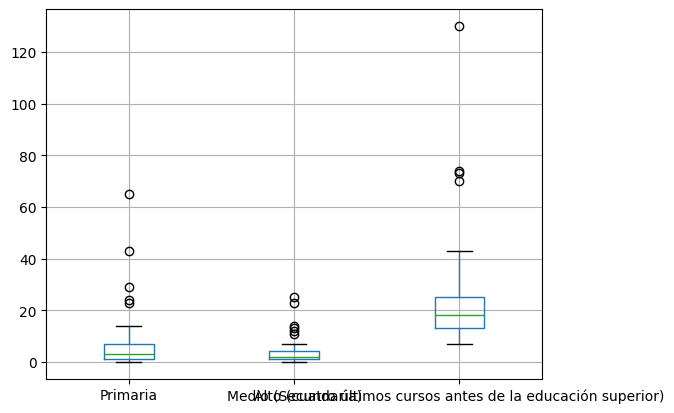

In [70]:
tiroteos_por_nivel_educativo.boxplot()  # Boxplot para detectar outliers
plt.show()

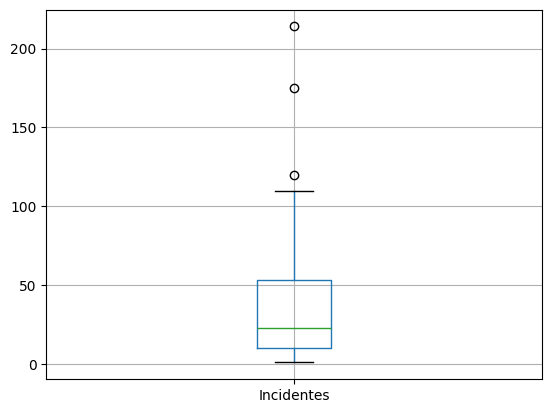

In [71]:
tiroteos_por_estado.boxplot()  # Boxplot para detectar outliers
plt.show()

In [43]:
print(tiroteos_por_estado.shape) # Se tiene una tabla de 51 filas por 3 columnas
print(tiroteos_por_nivel_educativo.shape) # Se tiene una tabla de 52 filas por 4 columnas

(51, 3)
(52, 4)


In [45]:
tiroteos_por_estado.info() # Vemos que tipo de datos se tienen en cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 1 to 51
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         51 non-null     object 
 1   Parámetro   51 non-null     object 
 2   Incidentes  51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [46]:
tiroteos_por_nivel_educativo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 4 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Año                                                          52 non-null     object 
 1   Primaria                                                     52 non-null     float64
 2   Medio (Secundaria)                                           52 non-null     float64
 3   Alto (cuatro últimos cursos antes de la educación superior)  52 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.8+ KB


In [52]:
print(tiroteos_por_estado.shape)          
print(tiroteos_por_estado.dtypes)         
print(tiroteos_por_estado.columns) 
print()
print(tiroteos_por_nivel_educativo.shape)          
print(tiroteos_por_nivel_educativo.dtypes)         
print(tiroteos_por_nivel_educativo.columns) 

(51, 3)
Año            object
Parámetro      object
Incidentes    float64
dtype: object
Index(['Año', 'Parámetro', 'Incidentes'], dtype='object')

(52, 4)
Año                                                             object
Primaria                                                       float64
Medio (Secundaria)                                             float64
Alto (cuatro últimos cursos antes de la educación superior)    float64
dtype: object
Index(['Año', 'Primaria', 'Medio (Secundaria)',
       'Alto (cuatro últimos cursos antes de la educación superior)'],
      dtype='object')


In [53]:
print(tiroteos_por_estado.describe()) # Estadísticas descriptivas

       Incidentes
count   51.000000
mean    39.058824
std     43.601106
min      1.000000
25%     10.000000
50%     23.000000
75%     53.000000
max    214.000000


In [54]:
print(tiroteos_por_nivel_educativo.describe()) 

        Primaria  Medio (Secundaria)  \
count  52.000000           52.000000   
mean    6.750000            3.942308   
std    11.517889            5.244655   
min     0.000000            0.000000   
25%     1.000000            1.000000   
50%     3.000000            2.000000   
75%     7.000000            4.250000   
max    65.000000           25.000000   

       Alto (cuatro últimos cursos antes de la educación superior)  
count                                          52.000000            
mean                                           24.557692            
std                                            21.475397            
min                                             7.000000            
25%                                            13.000000            
50%                                            18.000000            
75%                                            25.250000            
max                                           130.000000            


# 3. Missing Values

In [64]:
print(f'Tiroteos por estado\n\n',tiroteos_por_estado.isnull().sum())
print()
print('Tiroteos por nivel educativo\n\n',tiroteos_por_nivel_educativo.isnull().sum())

Tiroteos por estado

 Año           0
Parámetro     0
Incidentes    0
dtype: int64

Tiroteos por nivel educativo

 Año                                                            0
Primaria                                                       0
Medio (Secundaria)                                             0
Alto (cuatro últimos cursos antes de la educación superior)    0
dtype: int64


In [65]:
print(tiroteos_por_estado.duplicated().sum())
print(tiroteos_por_nivel_educativo.duplicated().sum())

0
0


# 4. Limpieza de datos

En este caso nuestra base de datos fuen una base de datos limpia, sin numeros nulos, no hay valores duplicados. Por lo que no fue necesario realizar una limpieza de la tabla.

Solamente borramos la columna de periodos la cual no fue relevante para nuestro análisis.

# 5. Visualización de datos

In [82]:
incidentes_2022 = tiroteos_por_estado.sort_values(by='Incidentes', ascending=False)

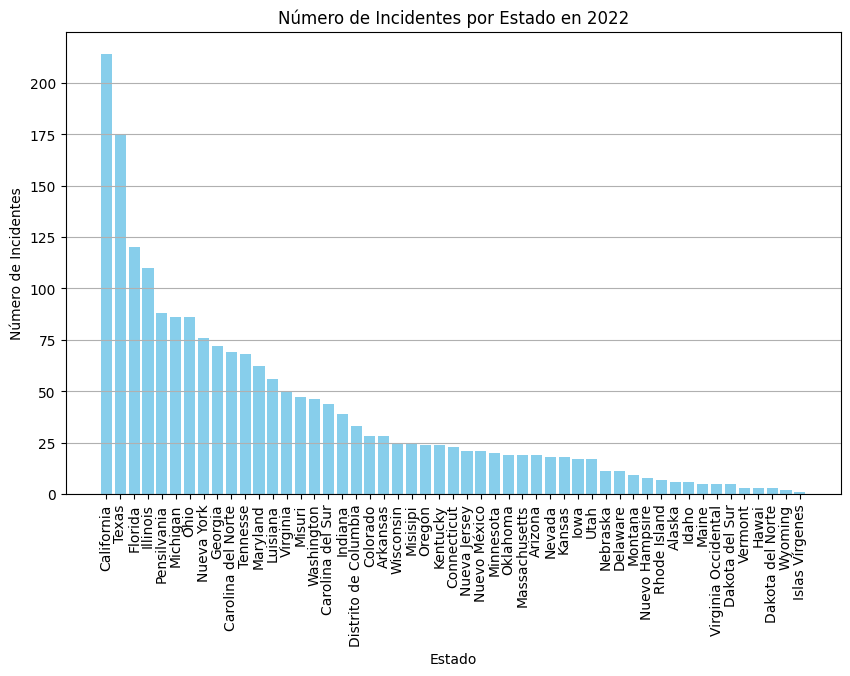

In [84]:
plt.figure(figsize=(10, 6))
plt.bar(incidentes_2022['Parámetro'], incidentes_2022['Incidentes'], color='skyblue')

plt.title('Número de Incidentes por Estado en 2022')
plt.xlabel('Estado')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=90) 
plt.grid(axis='y')

plt.show()

C:\Users\habar\AppData\Local\Temp\ipykernel_35892\31066831.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper left')
C:\Users\habar\AppData\Local\Temp\ipykernel_35892\31066831.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper right')


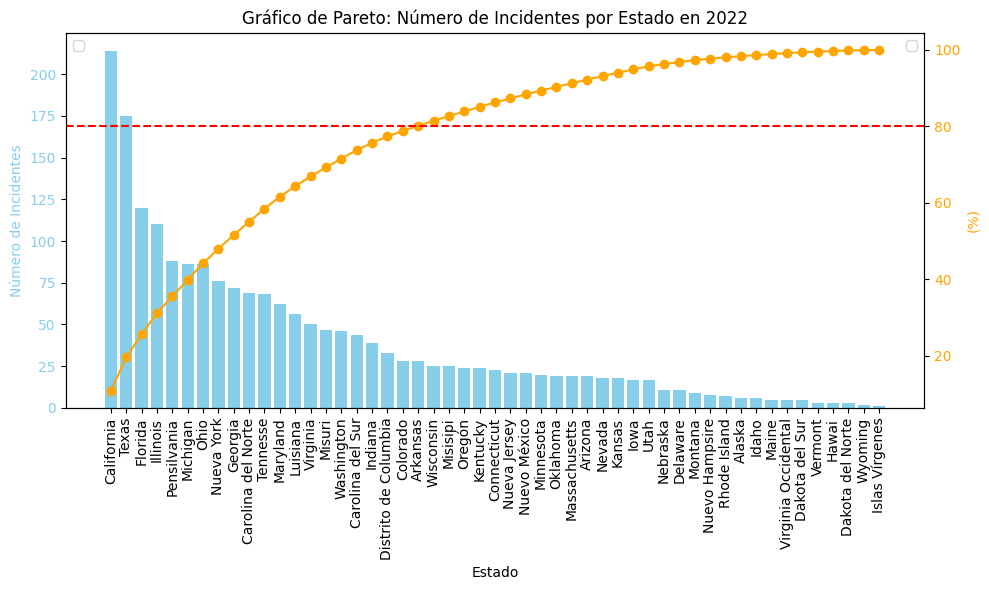

In [92]:
incidentes_2022['Porcentaje Acumulado'] = incidentes_2022['Incidentes'].cumsum() / incidentes_2022['Incidentes'].sum() * 100
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(incidentes_2022['Parámetro'], incidentes_2022['Incidentes'], color='skyblue')
ax1.set_xlabel('Estado')
ax1.set_ylabel('Número de Incidentes', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
plt.xticks(rotation=90)  
ax2 = ax1.twinx()
ax2.plot(incidentes_2022['Parámetro'], incidentes_2022['Porcentaje Acumulado'], color='orange', marker='o')
ax2.set_ylabel('(%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.axhline(80, color='red', linestyle='--')
plt.title('Gráfico de Pareto: Número de Incidentes por Estado en 2022')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

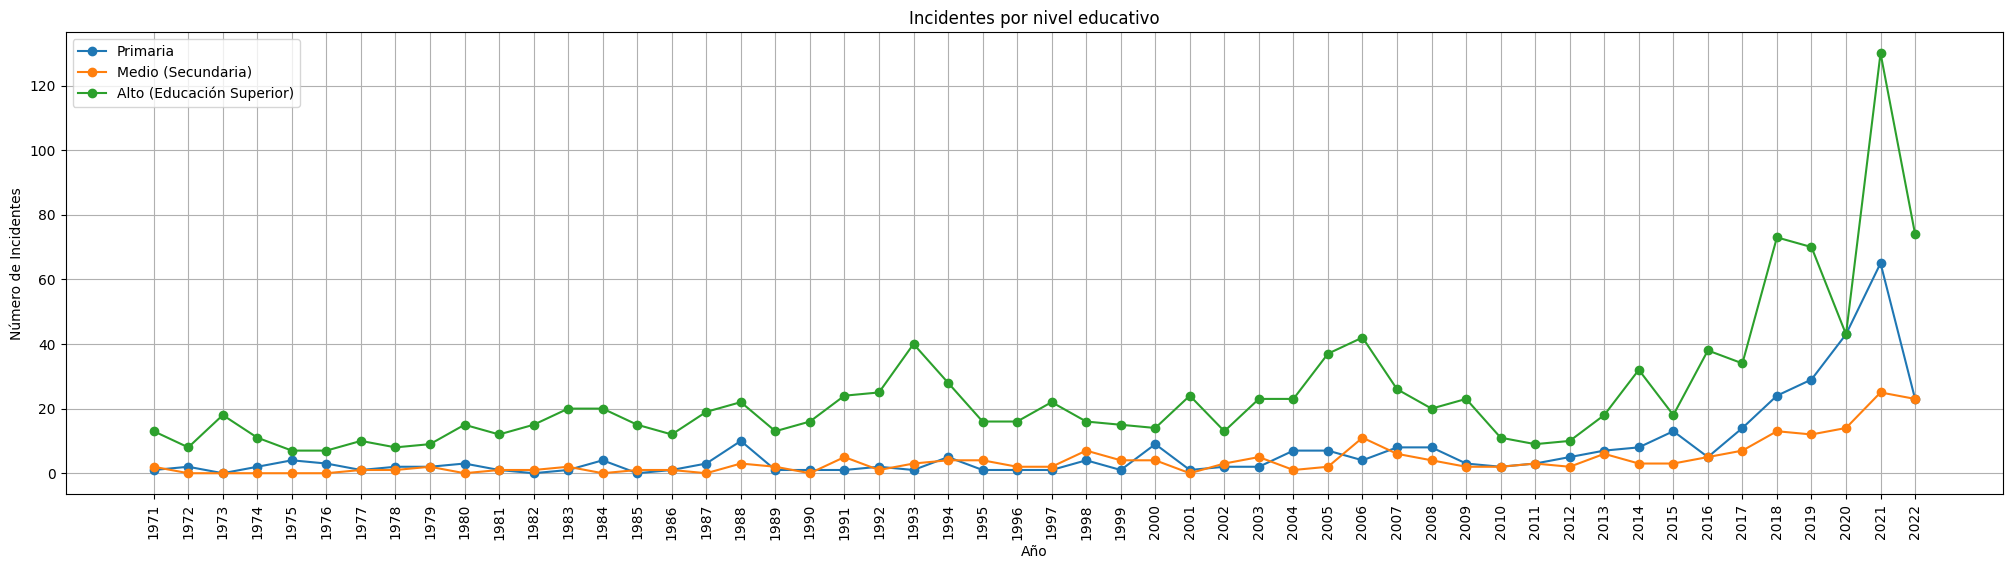

In [78]:
plt.figure(figsize=(25, 6))
plt.plot(tiroteos_por_nivel_educativo['Año'], tiroteos_por_nivel_educativo['Primaria'], marker='o', label='Primaria')
plt.plot(tiroteos_por_nivel_educativo['Año'], tiroteos_por_nivel_educativo['Medio (Secundaria)'], marker='o', label='Medio (Secundaria)')
plt.plot(tiroteos_por_nivel_educativo['Año'], tiroteos_por_nivel_educativo['Alto (cuatro últimos cursos antes de la educación superior)'], marker='o', label='Alto (Educación Superior)')

plt.title('Incidentes por nivel educativo')
plt.xlabel('Año')
plt.ylabel('Número de Incidentes')
plt.xticks(tiroteos_por_nivel_educativo['Año'],rotation=90)  
plt.legend()
plt.grid(True)
plt.show()

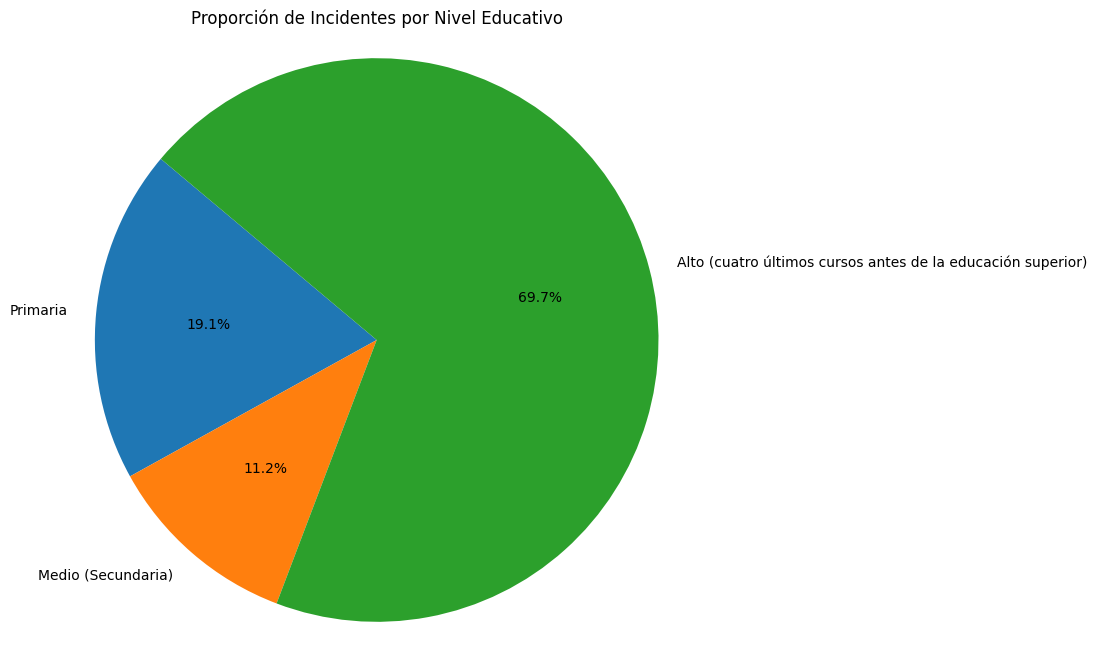

In [79]:
incident_sums = tiroteos_por_nivel_educativo[['Primaria', 'Medio (Secundaria)', 'Alto (cuatro últimos cursos antes de la educación superior)']].sum()
plt.figure(figsize=(8, 8))
plt.pie(incident_sums, labels=incident_sums.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Incidentes por Nivel Educativo')
plt.axis('equal') 
plt.show()

# 6. Comentarios adicionales

A través del análisis exploratorio de datos (EDA), se ha podido identificar patrones preocupantes en el comportamiento de los tiroteos ocurridos en Estados Unidos. Un hallazgo destacado es que la mayoría de los incidentes se registran en el nivel alto de educación, representando un alarmante 69.7% de todos los casos analizados. También se han reportado incidentes en el nivel primario, donde el 19.1% de los casos tienen lugar. Resulta inquietante contemplar la posibilidad de que eventos de este tipo se produzcan en entornos donde los estudiantes son tan jóvenes, lo que resalta la necesidad urgente de medidas de prevención y reforzar las medidas de seguridad en las escuelas.

El estado con la mayor cantidad de incidentes es Carolina del Norte, seguido de cerca por Texas, lo que plantea interrogantes sobre los factores específicos que contribuyen a estas altas tasas en dichos estados.

Un análisis de Pareto ha revelado que los estados con el mayor número de incidentes que se encuentran dentro del 80% de los casos registrados son:

    1. Carolina
    2. Texas
    3. Florida 
    5. Ilionis
    6. Pensilvania
    7. Michigan

Este análisis no solo destaca los estados más afectados, sino que también resalta la necesidad de políticas específicas y enfoques proactivos para abordar la problemática de los tiroteos en las escuelas. Es fundamental que se implementen estrategias de intervención dirigidas a reducir la incidencia de estos trágicos eventos, priorizando la seguridad y el bienestar de los estudiantes en todos los niveles educativos.


# 7. Referencias

epdata. (2022). Tiroteos en colegios en Estados Unidos, datos, gráficos y estadísticas. Recuperado el 06 de octubre de 2024, de epdata.
